In [0]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [0]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
from sklearn.cluster import KMeans

In [0]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [0]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  1.77945047  0.55553895 -0.16381415 -0.26630279 -0.36360255
   0.30161844 -0.20993782 -0.28631303  0.07714909 -0.06158693  0.01905363
   0.32268722 -0.17405476 -0.01003755 -0.29857304  0.74304763  0.56544578
   0.15078538  0.05721408]
 [ 0.02425436 -0.47949498 -0.2730736  -0.25211343 -0.27045122  0.06715779
  -0.03984436  0.08495479  0.15795732 -0.139547    0.02967474  0.03096649
  -0.11464877 -0.00628803  0.02003386  0.11884858 -0.21319196 -0.09413105
  -0.01935    -0.00496482]
 [-0.05917995 -0.0987796   0.8968363   2.23664878  2.5878729   0.2519166
  -0.32826065 -0.20176991 -0.59169556  0.88866543 -0.09492563 -0.27250055
   0.19033986  0.40959419 -0.12974119 -0.27211478  0.0562637  -0.46926249
  

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,1.779450,0.555539,-0.163814,-0.266303,-0.363603,0.301618,-0.209938,-0.286313,0.077149,-0.061587,0.019054,0.322687,-0.174055,-0.010038,-0.298573,0.743048,0.565446,0.150785,0.057214
1,0.024254,-0.479495,-0.273074,-0.252113,-0.270451,0.067158,-0.039844,0.084955,0.157957,-0.139547,0.029675,0.030966,-0.114649,-0.006288,0.020034,0.118849,-0.213192,-0.094131,-0.019350,-0.004965
2,-0.059180,-0.098780,0.896836,2.236649,2.587873,0.251917,-0.328261,-0.201770,-0.591696,0.888665,-0.094926,-0.272501,0.190340,0.409594,-0.129741,-0.272115,0.056264,-0.469262,-0.168383,-0.081767


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c319d4e0>,
      dtype=object)

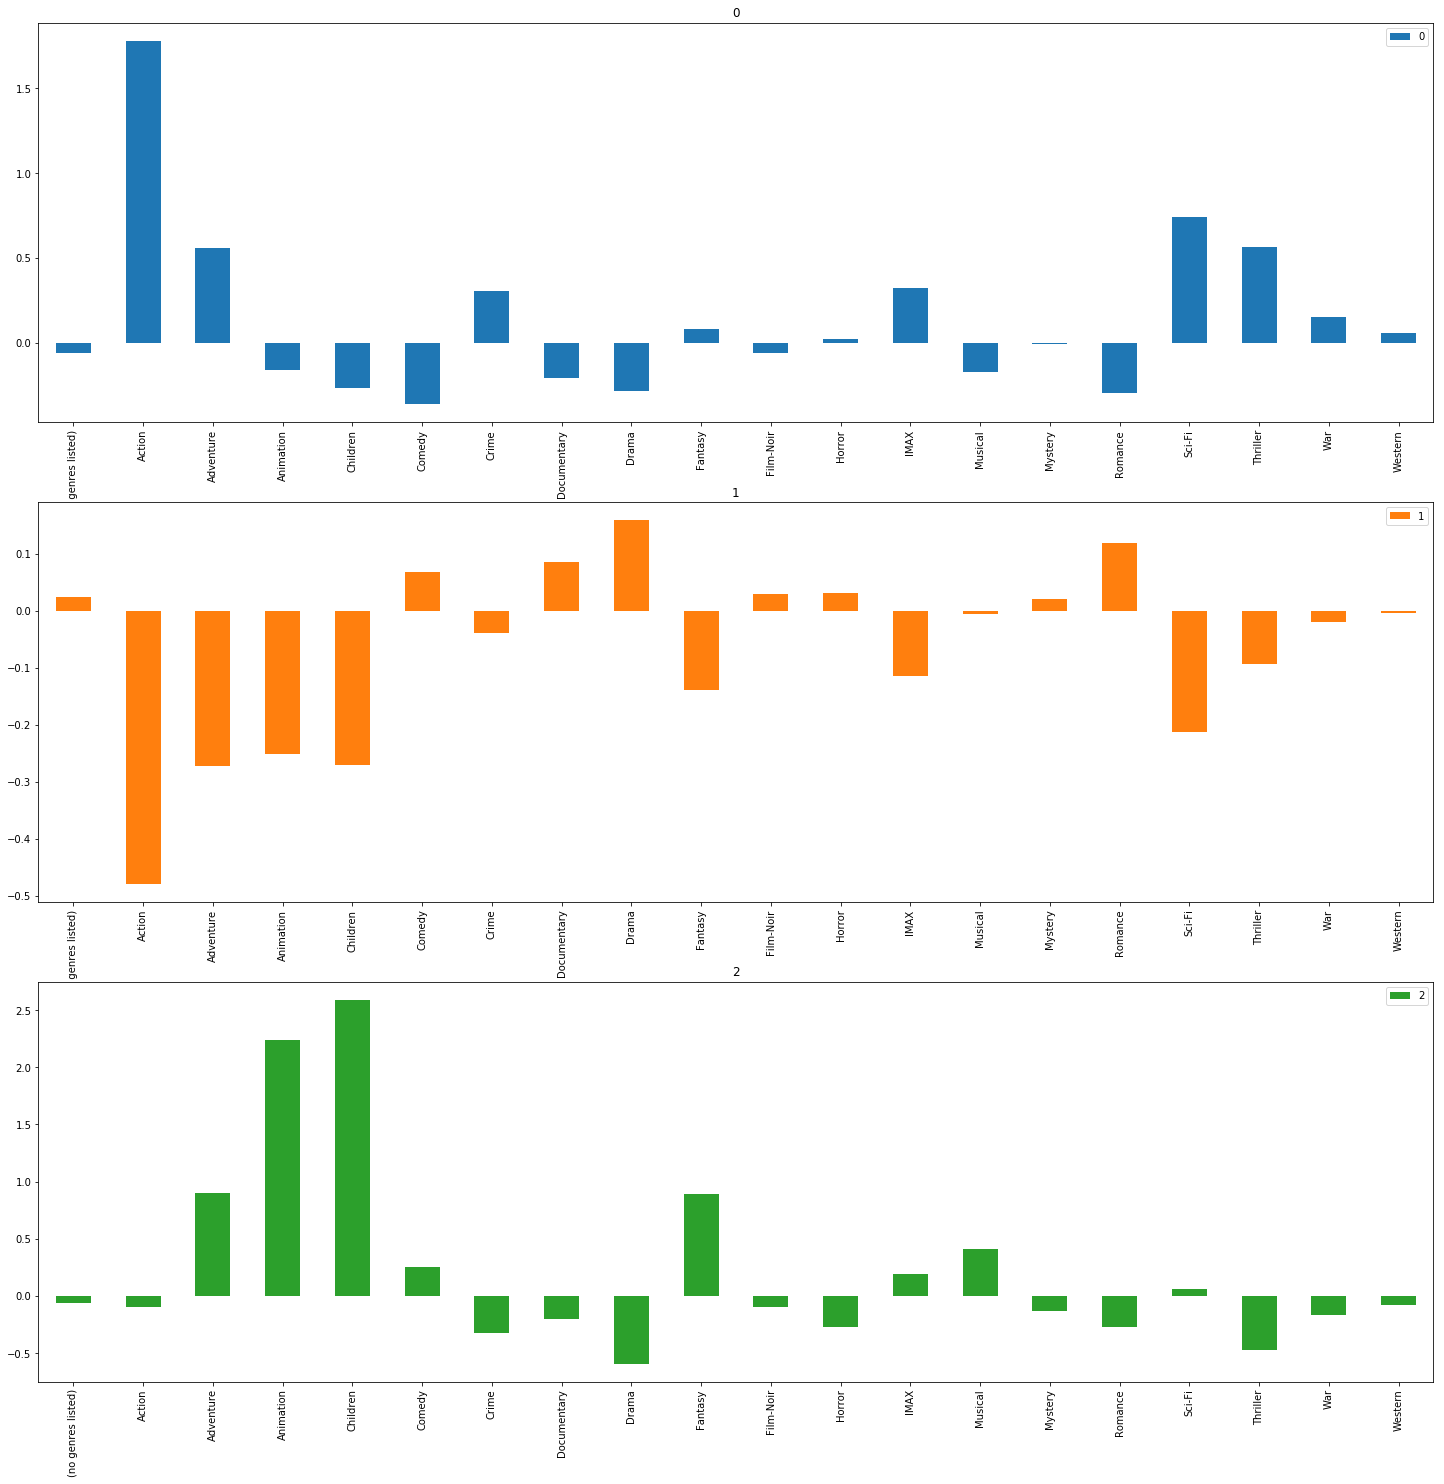

In [0]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [0]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9087,143355,Wonder Woman (2017),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8894,134775,Dragon Blade (2015),Action|Adventure|Drama,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8166,102716,"Fast & Furious 6 (Fast and the Furious 6, The)...",Action|Crime|Thriller|IMAX,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8295,106487,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6522,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6374,50003,DOA: Dead or Alive (2006),Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3390,4613,K-9 (1989),Action|Comedy|Crime,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9222,152079,London Has Fallen (2016),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6508,53519,Death Proof (2007),Action|Adventure|Crime|Horror|Thriller,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
8786,129397,Marvel One-Shot: Item 47 (2012),Action|Fantasy|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-57.61197   , -20.176783  ],
       [ 57.980183  ,   4.617795  ],
       [-46.436092  ,  -0.67735666],
       ...,
       [  9.0941305 ,   7.6219196 ],
       [ 34.448307  ,  -9.311135  ],
       [-26.533556  , -16.973427  ]], dtype=float32)

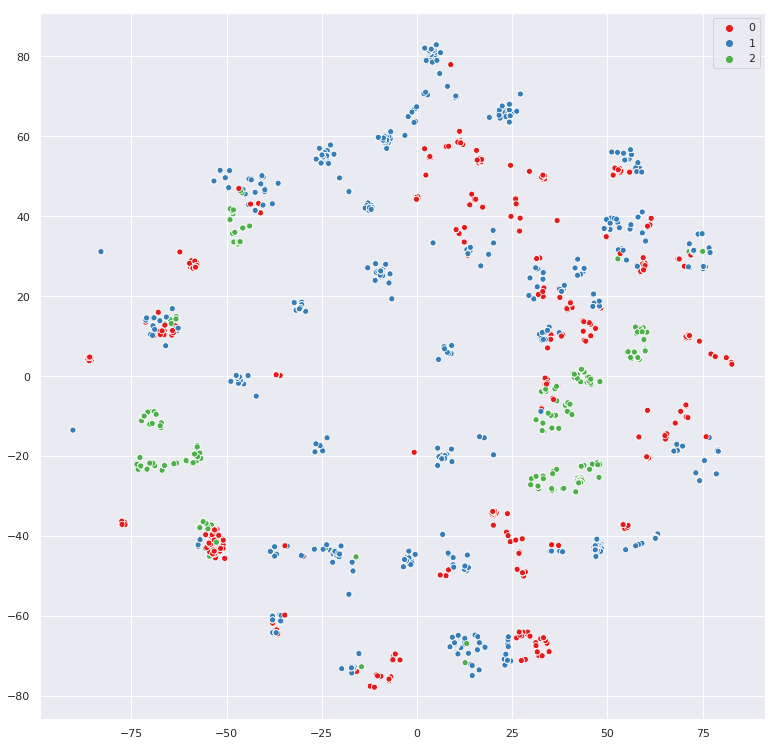

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c05829e8>,
      dtype=object)

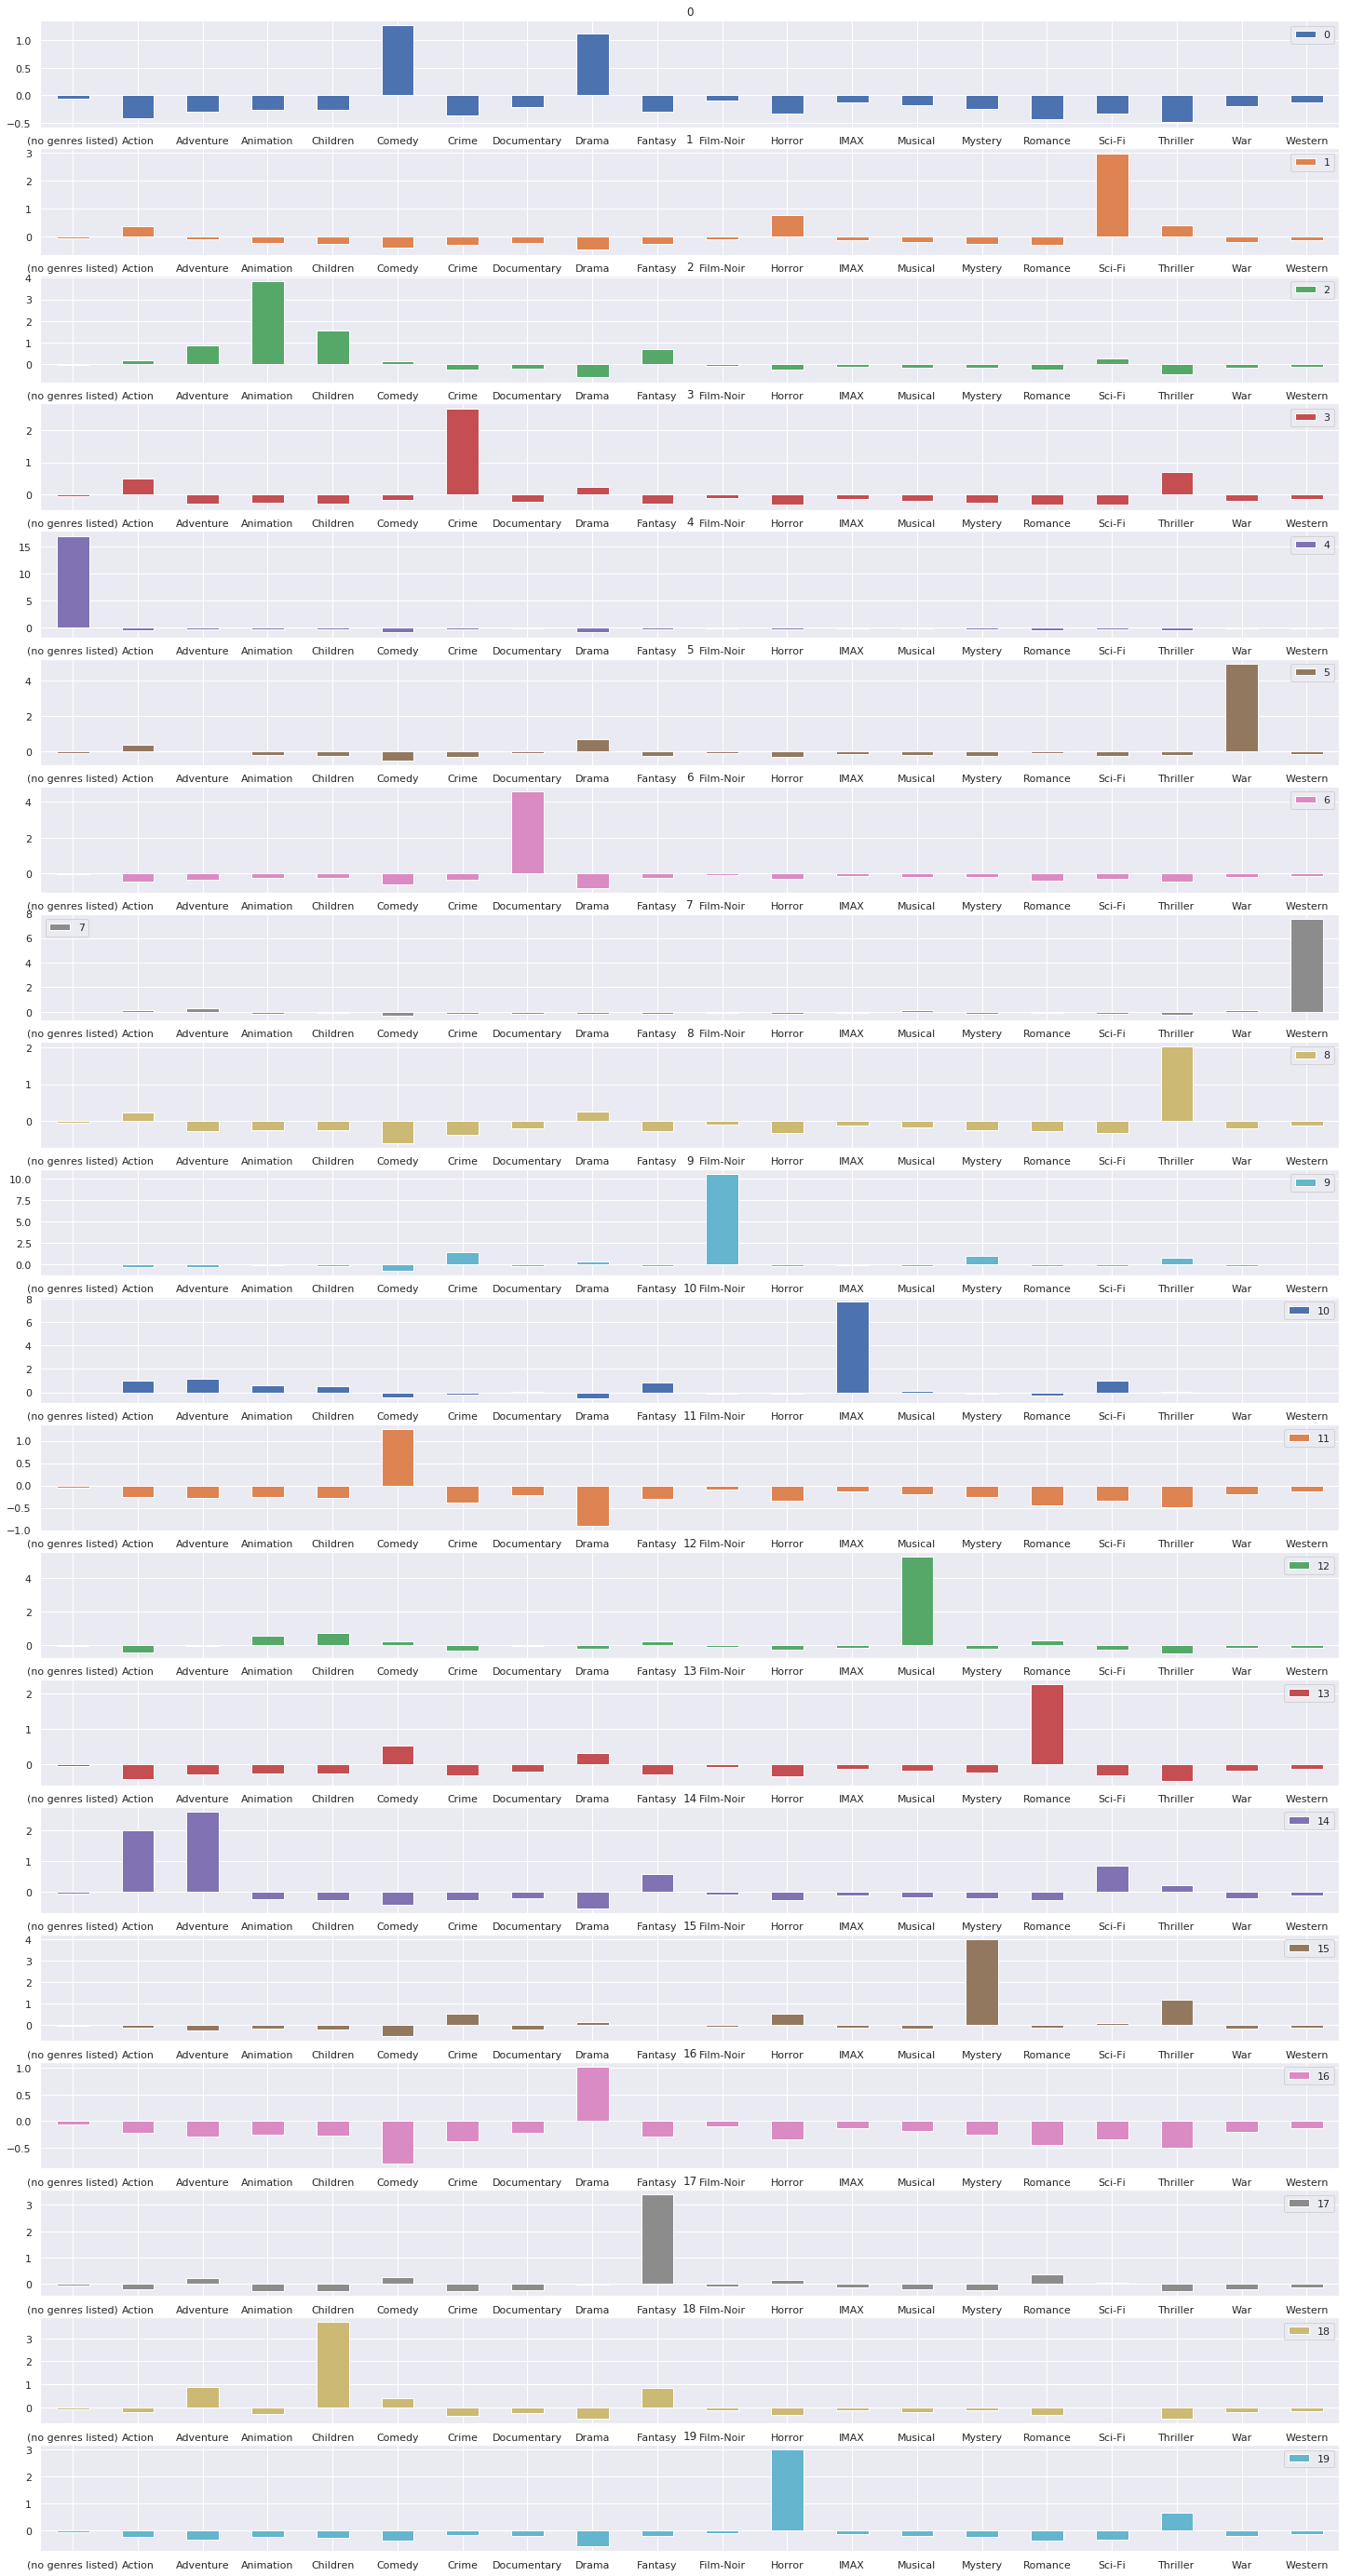

In [0]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [0]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7279,74791,"Town Called Panic, A (Panique au village) (2009)",Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8080,99813,"Batman: The Dark Knight Returns, Part 2 (2013)",Action|Animation,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,104076,"Smurfs 2, The (2013)",Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9601,176051,LEGO DC Super Hero Girls: Brain Drain (2017),Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8534,115065,Justin and the Knights of Valour (2013),Adventure|Animation,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8047,98604,From Up on Poppy Hill (Kokuriko-zaka kara) (2011),Animation|Drama|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2694,3615,Dinosaur (2000),Adventure|Animation|Children,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,68954,Up (2009),Adventure|Animation|Children|Drama,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,83132,"Secret World of Arrietty, The (Kari-gurashi no...",Animation|Children|Fantasy,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,172887,Kid's Story (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_escalados)

[20, 57104.93720306674]

In [0]:
kmeans(3, generos_escalados)

[3, 166226.32865439524]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 167109.1819301267],
 [4, 156805.27020228506],
 [5, 147443.51287471023],
 [6, 138672.3960647879],
 [7, 128329.89023941127],
 [8, 117097.09076731533],
 [9, 110662.22958410968],
 [10, 101325.42343560503],
 [11, 93738.1979825316],
 [12, 86128.11834826067],
 [13, 79720.49427535535],
 [14, 75275.79822354915],
 [15, 68020.48336500165],
 [16, 63739.94406721202],
 [17, 60978.792165263425],
 [18, 58357.335248827956],
 [19, 58122.02544841826],
 [20, 57030.86552578748],
 [21, 53859.96569165589],
 [22, 51543.133495246846],
 [23, 50121.38813206847],
 [24, 49598.8923979011],
 [25, 48113.44127764335],
 [26, 46568.21912135742],
 [27, 45975.13601818942],
 [28, 44567.158489444904],
 [29, 43857.09486943863],
 [30, 43269.96463332317],
 [31, 42290.811359577616],
 [32, 41008.02098984361],
 [33, 40646.08784635828],
 [34, 39321.777821318945],
 [35, 38347.80715092857],
 [36, 38381.713178964994],
 [37, 37610.00291168513],
 [38, 36597.07026229276],
 [39, 35795.024805

In [0]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,167109.181930
3,4,156805.270202
4,5,147443.512875
5,6,138672.396065
6,7,128329.890239
7,8,117097.090767
8,9,110662.229584
9,10,101325.423436


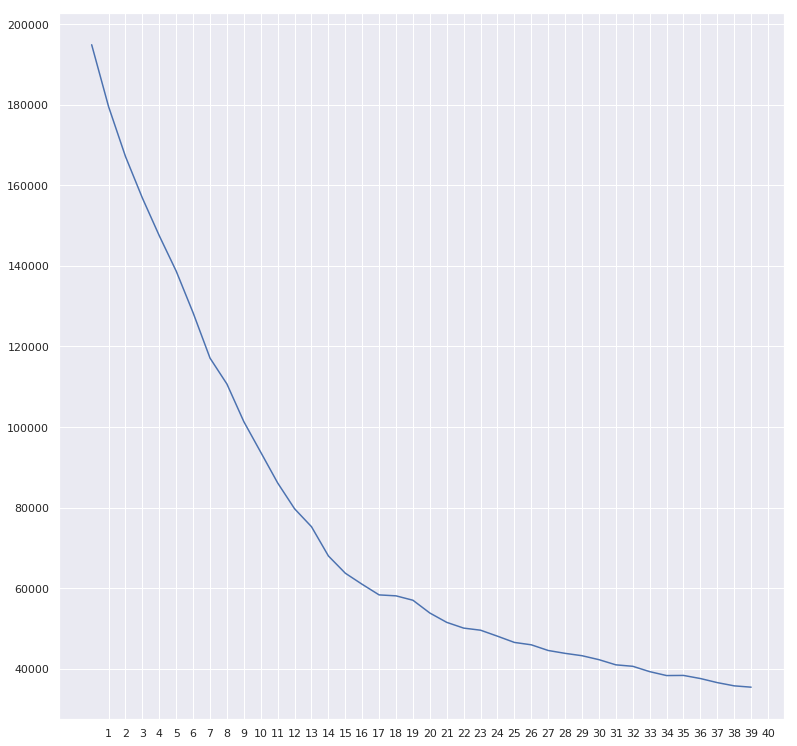

In [0]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bde73828>,
      dtype=object)

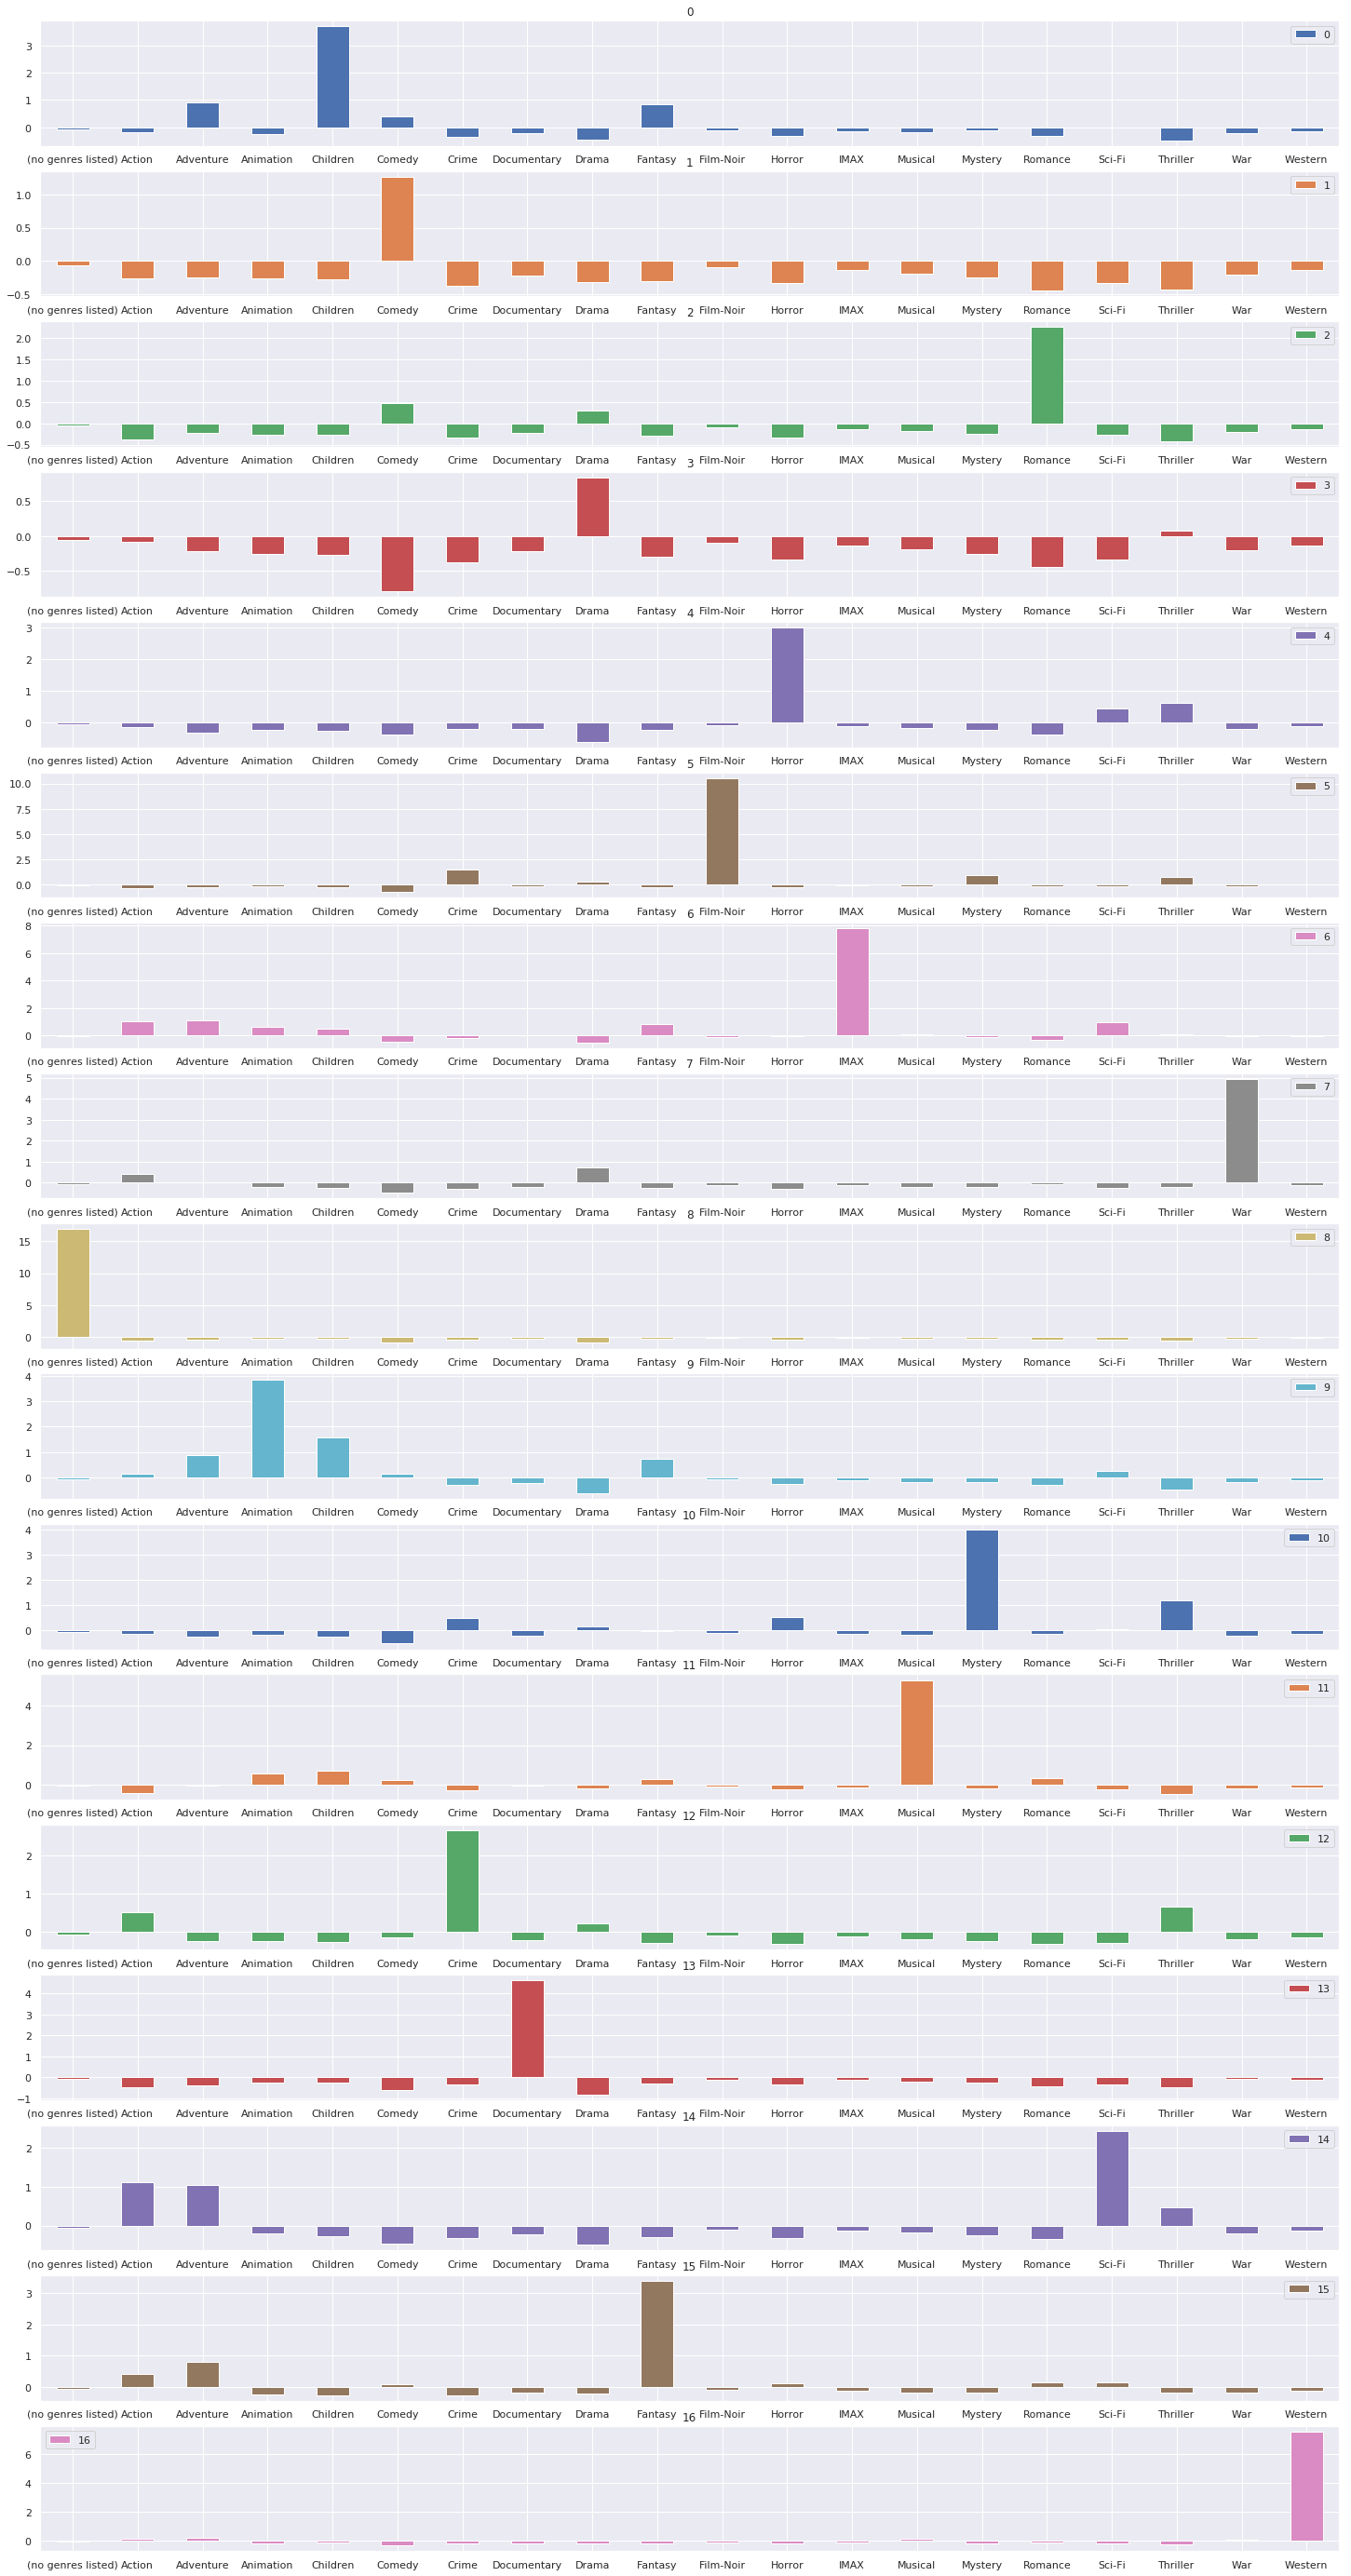

In [0]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [0]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2733,3671,Blazing Saddles (1974),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
399,458,Geronimo: An American Legend (1993),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7483,82459,True Grit (2010),Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3259,4406,"Man Who Shot Liberty Valance, The (1962)",Crime|Drama|Western,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6648,56782,There Will Be Blood (2007),Drama|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2896,3873,Cat Ballou (1965),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5479,26249,They Call Me Trinity (1971),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2743,3681,For a Few Dollars More (Per qualche dollaro in...,Action|Drama|Thriller|Western,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 29.239061 , -61.942688 ],
       [ 53.922688 , -52.700977 ],
       [-12.707917 ,  17.128963 ],
       ...,
       [ 33.94113  ,   5.276442 ],
       [-13.571043 , -47.659454 ],
       [ -2.0098999,  -6.5729895]], dtype=float32)

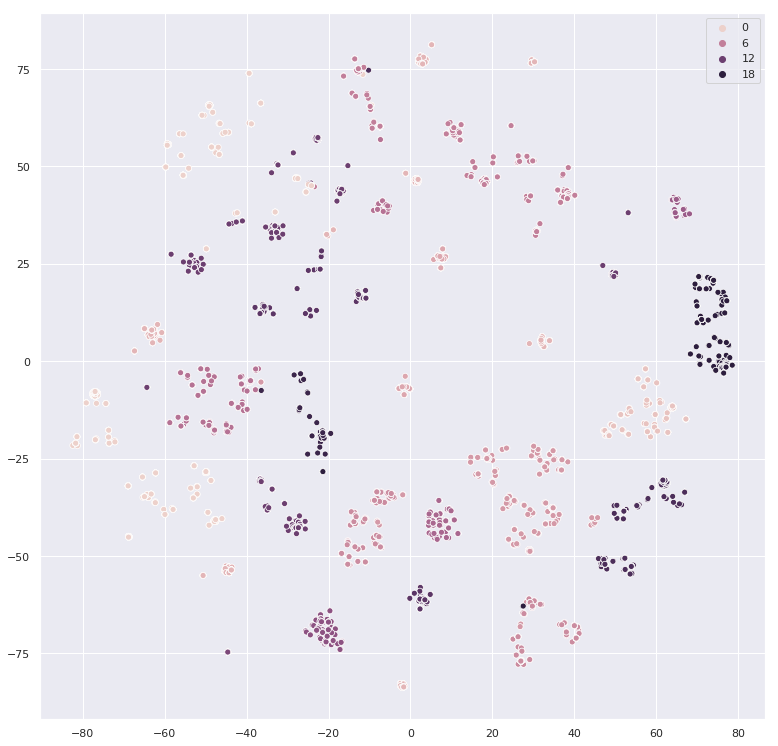

In [0]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5bb1bfdd8>,
      dtype=object)

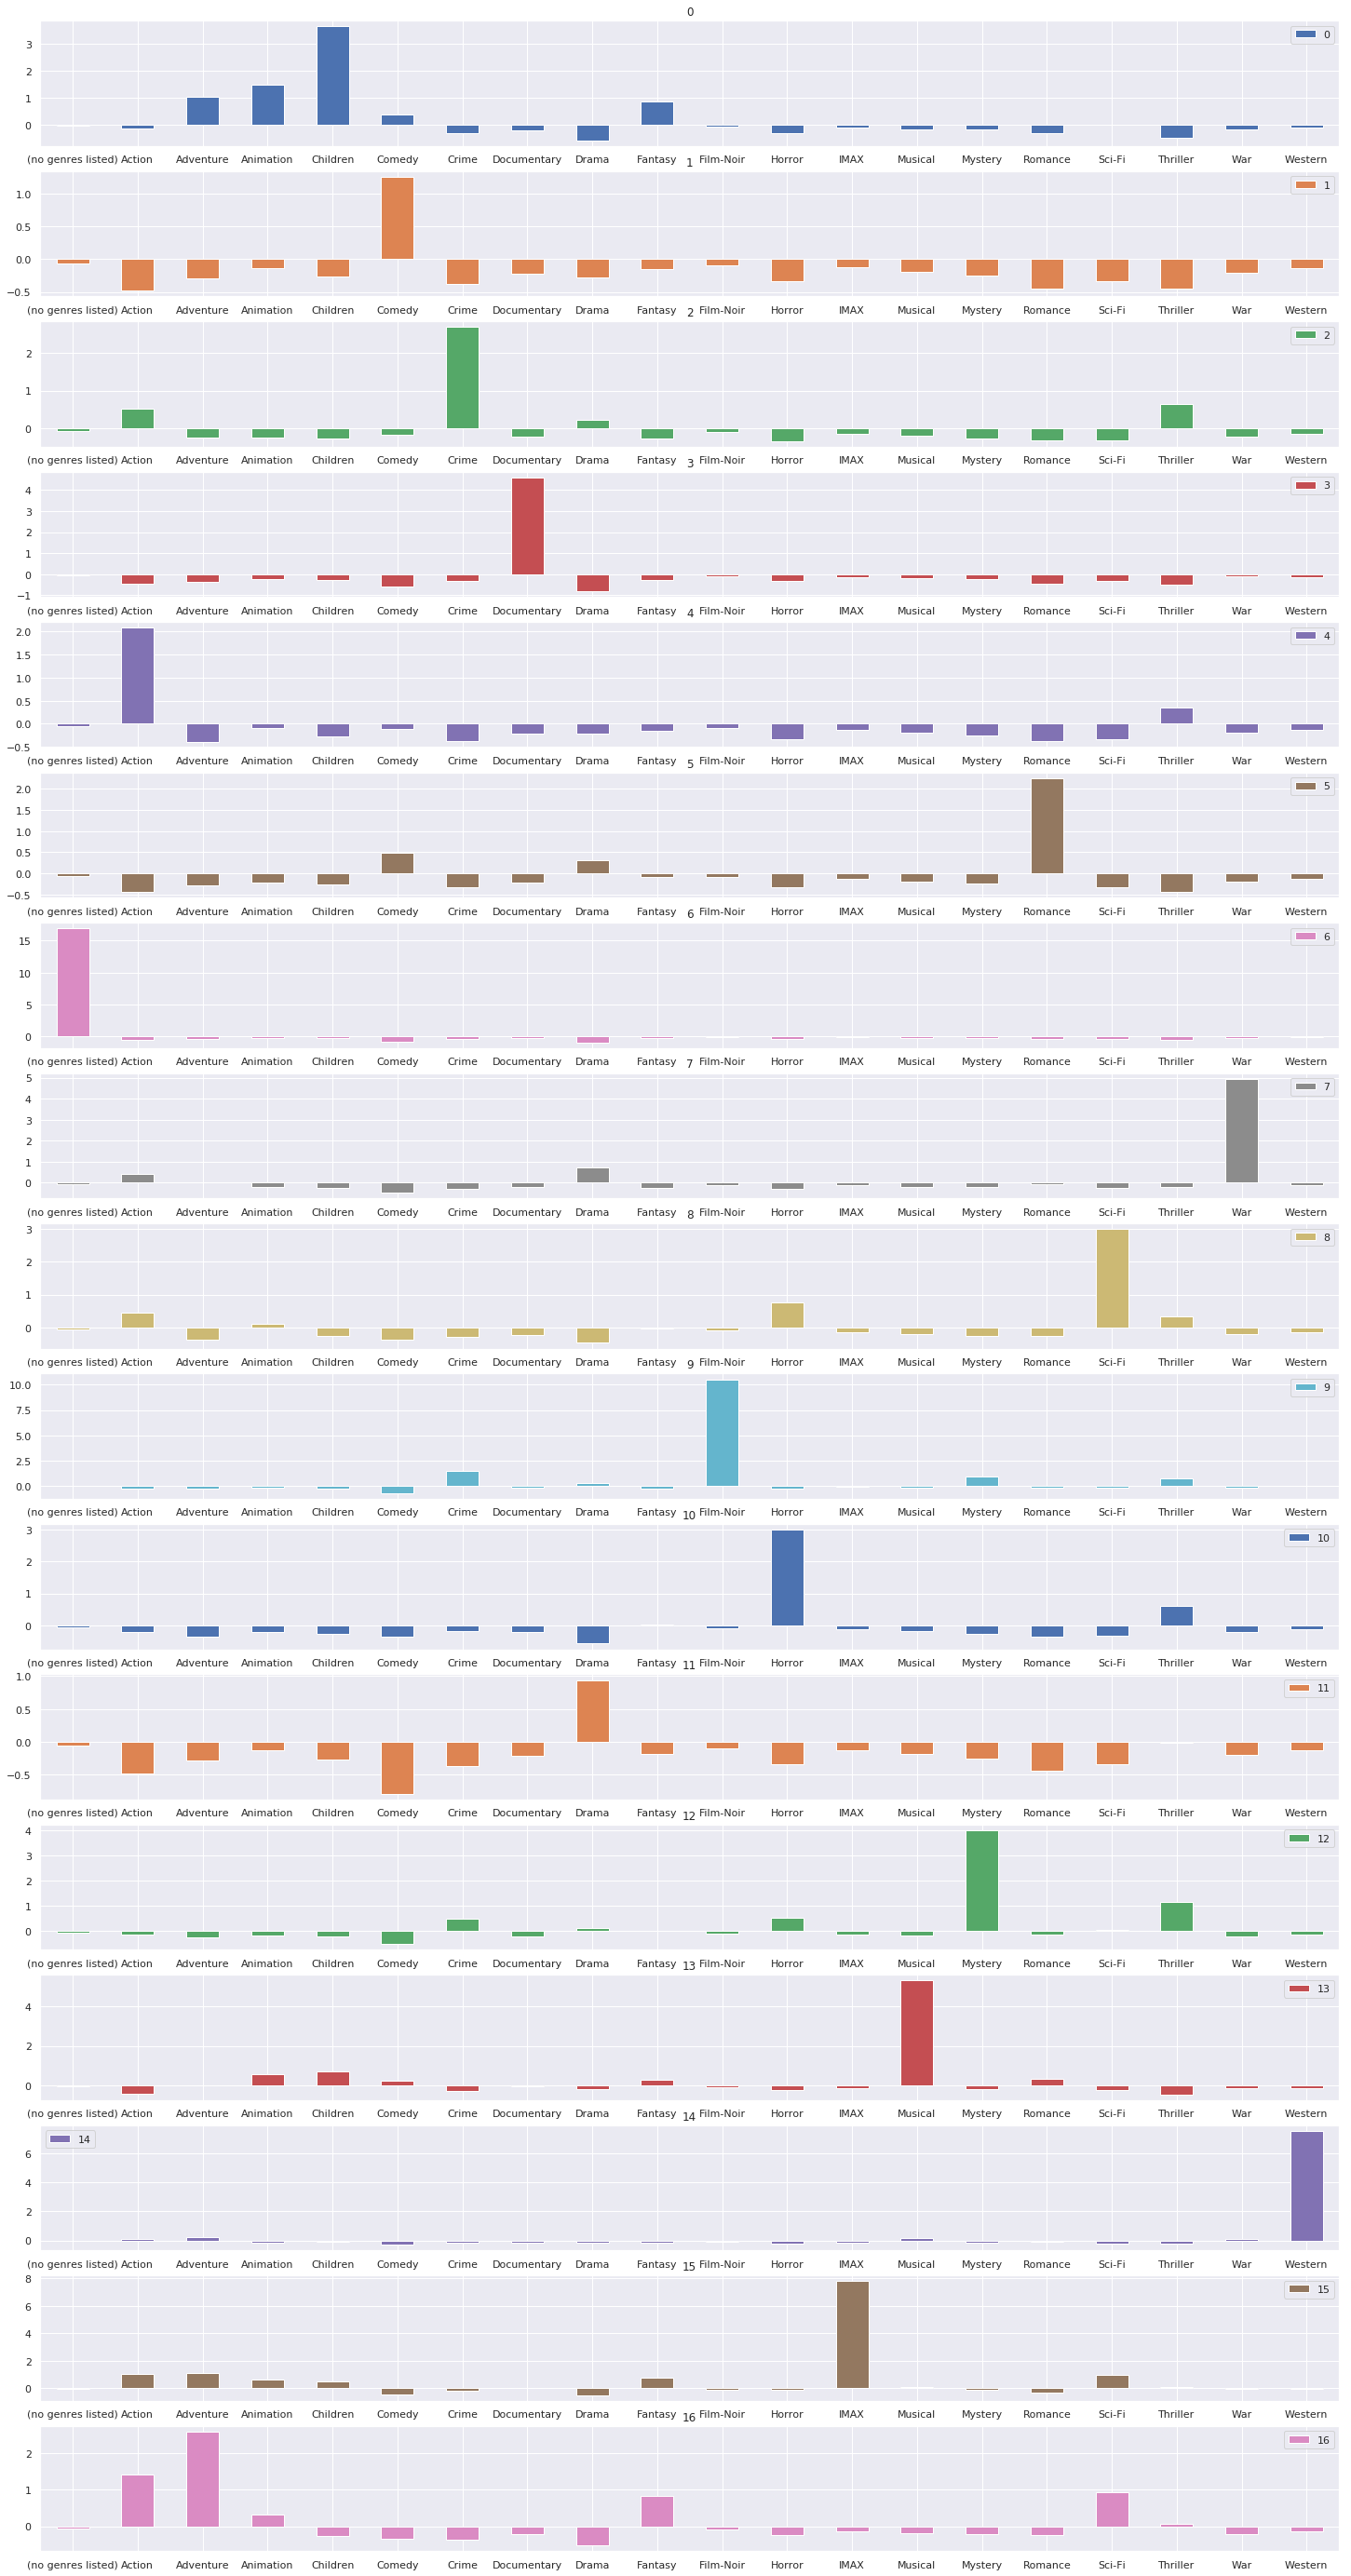

In [0]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [0]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        , 11.        ,  2.42987209,  2.        ],
       [ 5.        , 17.        ,  2.87485746,  3.        ],
       [ 4.        , 18.        ,  2.91858518,  4.        ],
       [ 2.        , 19.        ,  3.41893186,  5.        ],
       [16.        , 20.        ,  3.50811997,  6.        ],
       [10.        , 21.        ,  3.75922045,  7.        ],
       [ 8.        , 22.        ,  3.88448948,  8.        ],
       [ 0.        , 23.        ,  4.6808461 ,  9.        ],
       [12.        , 24.        ,  4.68874519, 10.        ],
       [ 3.        , 25.        ,  5.15266168, 11.        ],
       [ 7.        , 26.        ,  5.27047759, 12.        ],
       [13.        , 27.        ,  5.79762689, 13.        ],
       [14.        , 28.        ,  7.87409402, 14.        ],
       [15.        , 29.        ,  8.11856361, 15.        ],
       [ 9.        , 30.        , 10.81675845, 16.        ],
       [ 6.        , 31.        , 17.06440188, 17.        ]])

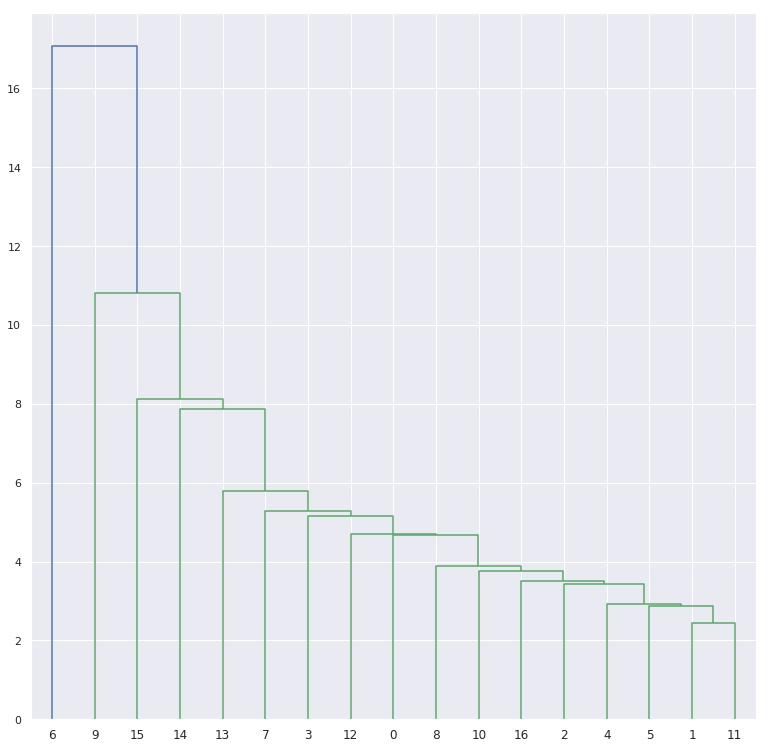

In [0]:
dendrograma = dendrogram(matriz_de_distancia)